In [340]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [341]:
df = pd.read_excel('covid19.xlsx')
df

,ФИО,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,X_оценка,Диагноз,Клин_Оценка,NEWS-2,NEWS_Оценка
0,Авсеевич Татьяна Васильевна,1,84,2,80.30,58,53,СТ,внебольн.двустор.полисегм.пневм.тяжел теч. ДН II,Т,2,Л
1,Алишоев С.М.,2,46,1,92.22,85,60,СТ,"внебольничная полисегментарная , ДН 0",СТ,2,Л
2,Андреева Галина Михайлова,3,65,2,67.10,83,42,СТ,"внебольн. двусторон. Полисегм пневм, легк.теч....",СТ,1,Л
3,Артемьев Евгений Евгеньевич,4,79,1,126.50,46,61,СТ,"внебольн. двусторон.полисегм.пнемония, тяжелог...",Т,4,Л
4,Астахов Александр Николаевич,5,65,1,109.00,61,88,Т,"внеб.двустор.полисегм.пневм, критическая ст.тя...",Т,8,Т
...,...,...,...,...,...,...,...,...,...,...,...,...
300,Федорова Ольга Лукьяновна,301,67,2,78.50,67,50,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 0-1 ст.,СТ,3,Л
301,Фомичева Антонина Михайловна,302,67,2,88.94,58,56,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,7,Т
302,Харсеева Наталия Вячеславовна,303,45,2,76.10,82,83,Т,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,4,Л
303,Хорькова Татьяна Григорьевна,304,65,2,91.08,57,44,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,3,Л


# удалим не количественные данные

In [342]:
data = df.drop(columns=['ФИО','№','Диагноз'])
data.columns

Index(['Возраст', 'Пол', 'Креат. 1', 'рСКФ', 'Критерий Х', 'X_оценка',
       'Клин_Оценка', 'NEWS-2', 'NEWS_Оценка'],
      dtype='object')

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Возраст      305 non-null    int64  
 1   Пол          305 non-null    int64  
 2   Креат. 1     305 non-null    float64
 3   рСКФ         305 non-null    int64  
 4   Критерий Х   305 non-null    int64  
 5   X_оценка     305 non-null    object 
 6   Клин_Оценка  305 non-null    object 
 7   NEWS-2       305 non-null    int64  
 8   NEWS_Оценка  305 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 21.6+ KB


In [344]:
data

,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,X_оценка,Клин_Оценка,NEWS-2,NEWS_Оценка
0,84,2,80.30,58,53,СТ,Т,2,Л
1,46,1,92.22,85,60,СТ,СТ,2,Л
2,65,2,67.10,83,42,СТ,СТ,1,Л
3,79,1,126.50,46,61,СТ,Т,4,Л
4,65,1,109.00,61,88,Т,Т,8,Т
...,...,...,...,...,...,...,...,...,...
300,67,2,78.50,67,50,СТ,СТ,3,Л
301,67,2,88.94,58,56,СТ,СТ,7,Т
302,45,2,76.10,82,83,Т,СТ,4,Л
303,65,2,91.08,57,44,СТ,СТ,3,Л


# необходимо категориальные данные (такие как пол) переквалифицировать в бинарные. категориальные данные -- это те, которые имеют тип object в таблице выше

In [345]:
binary_data = pd.get_dummies(data=data, columns=['X_оценка','Клин_Оценка','NEWS_Оценка','Пол'])
binary_data

,Возраст,Креат. 1,рСКФ,Критерий Х,NEWS-2,X_оценка_Л,X_оценка_СТ,X_оценка_СТ,X_оценка_Т,Клин_Оценка_Л,Клин_Оценка_СТ,Клин_Оценка_Т,NEWS_Оценка_Д,NEWS_Оценка_Л,NEWS_Оценка_СТ,NEWS_Оценка_Т,NEWS_Оценка_Т,Пол_1,Пол_2
0,84,80.30,58,53,2,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,46,92.22,85,60,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,65,67.10,83,42,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,79,126.50,46,61,4,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,65,109.00,61,88,8,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,67,78.50,67,50,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1
301,67,88.94,58,56,7,0,1,0,0,0,1,0,0,0,0,1,0,0,1
302,45,76.10,82,83,4,0,0,0,1,0,1,0,0,1,0,0,0,0,1
303,65,91.08,57,44,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [346]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Возраст         305 non-null    int64  
 1   Креат. 1        305 non-null    float64
 2   рСКФ            305 non-null    int64  
 3   Критерий Х      305 non-null    int64  
 4   NEWS-2          305 non-null    int64  
 5   X_оценка_Л      305 non-null    uint8  
 6   X_оценка_СТ     305 non-null    uint8  
 7   X_оценка_СТ     305 non-null    uint8  
 8   X_оценка_Т      305 non-null    uint8  
 9   Клин_Оценка_Л   305 non-null    uint8  
 10  Клин_Оценка_СТ  305 non-null    uint8  
 11  Клин_Оценка_Т   305 non-null    uint8  
 12  NEWS_Оценка_Д   305 non-null    uint8  
 13  NEWS_Оценка_Л   305 non-null    uint8  
 14  NEWS_Оценка_СТ  305 non-null    uint8  
 15  NEWS_Оценка_Т   305 non-null    uint8  
 16  NEWS_Оценка_Т   305 non-null    uint8  
 17  Пол_1           305 non-null    uin

# теперь все данные имеют числовой порядок

<Axes: xlabel='Возраст', ylabel='Count'>

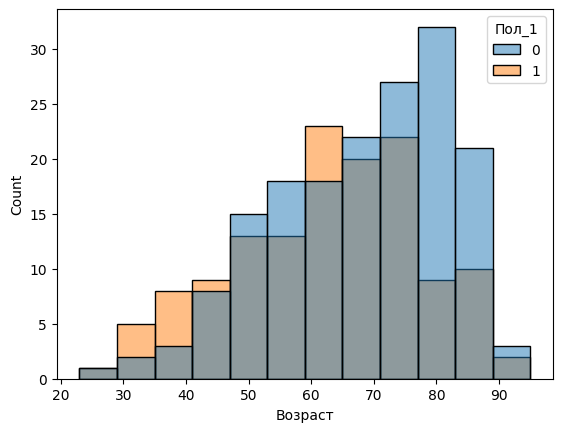

In [347]:
# Для качественной оценки данных, построем несколько графиков
# Начнём с графика возраста, с детерминацие пола пациента
sns.histplot(data=binary_data, x ='Возраст',hue='Пол_1')

<Axes: xlabel='Креат. 1', ylabel='Count'>

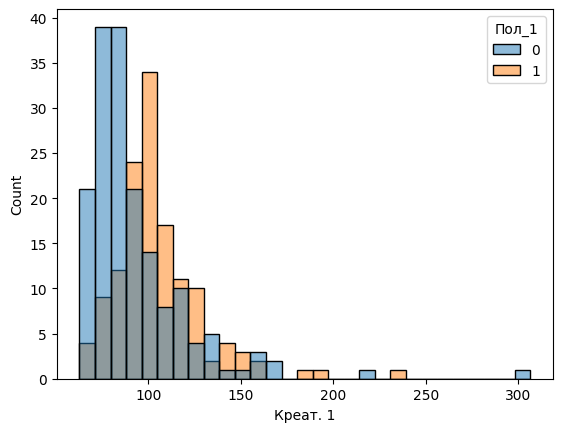

In [348]:
# График распределения "Креат. 1"
sns.histplot(data=binary_data, x ='Креат. 1',hue='Пол_1')

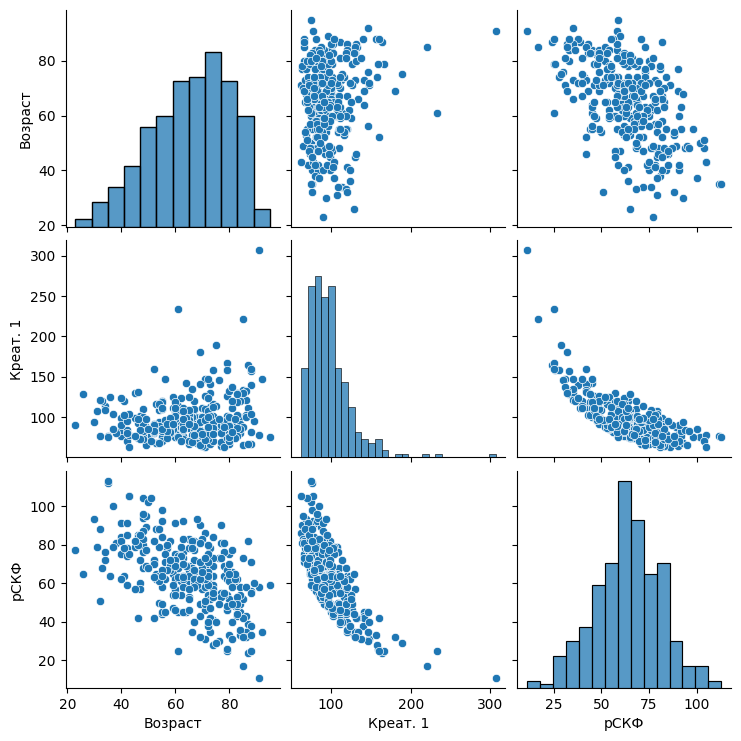

In [349]:
sns.pairplot(data[['Возраст', 'Креат. 1', 'рСКФ']])

In [350]:
# разобъем наши данные на обучающие и тестовые, чтобы компьюетр мог выявить алгоритм, если он имеется

In [351]:
X = binary_data[['Возраст', 'Креат. 1', 'рСКФ','NEWS-2','Пол_1']]
len(np.unique(X['NEWS-2']))

10

In [352]:
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [353]:
data.columns

Index(['Возраст', 'Пол', 'Креат. 1', 'рСКФ', 'Критерий Х', 'X_оценка',
       'Клин_Оценка', 'NEWS-2', 'NEWS_Оценка'],
      dtype='object')

In [354]:
le.fit(data['NEWS-2'])

LabelEncoder()

In [355]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12])

In [356]:
y = pd.Series(data = le.transform(data['NEWS-2']))

In [357]:
X.drop(columns=['NEWS-2'],inplace=True)

In [358]:
X

,Возраст,Креат. 1,рСКФ,Пол_1
0,84,80.30,58,0
1,46,92.22,85,1
2,65,67.10,83,0
3,79,126.50,46,1
4,65,109.00,61,1
...,...,...,...,...
300,67,78.50,67,0
301,67,88.94,58,0
302,45,76.10,82,0
303,65,91.08,57,0


In [359]:
y

0      2
1      2
2      1
3      4
4      8
      ..
300    3
301    7
302    4
303    3
304    3
Length: 305, dtype: int64

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [361]:
model = LogisticRegression()
modelsvc = SVC()
model.fit(X_train,y_train)
modelsvc.fit(X_train,y_train)

SVC()

# Первый признак оценки состоит в том, чтобы оценить насколько хорошо предсказываются значения. Метрика accuracy

$$
accuracy(y, \hat{y}) = \frac{1}{n_{samles}} \sum\limits_{i=0}^{n_{samles}-1}1(\hat{y}=y)
$$

In [362]:
# Linearmodel 
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.19672131147540983

In [363]:
# SVC 
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_test, modelsvc.predict(X_test))

0.2459016393442623

In [364]:
np.array(y_test)

array([7, 3, 5, 5, 3, 5, 3, 3, 3, 2, 3, 1, 8, 7, 2, 2, 6, 9, 0, 4, 2, 4,
       3, 2, 3, 5, 1, 4, 4, 3, 3, 1, 4, 6, 2, 3, 3, 5, 3, 3, 2, 4, 4, 6,
       7, 3, 2, 2, 3, 3, 4, 6, 4, 2, 2, 3, 5, 4, 4, 7, 2])

In [365]:
for i in range(0,len(X_test)):
    print(model.predict_proba(X_test)[i].round(2), np.array(y_test)[i])

[0.04 0.16 0.15 0.22 0.19 0.09 0.06 0.09 0.02] 7
[0.04 0.15 0.26 0.21 0.12 0.09 0.08 0.05 0.01] 3
[0.04 0.17 0.14 0.22 0.16 0.08 0.07 0.09 0.02] 5
[0.03 0.12 0.31 0.2  0.15 0.09 0.04 0.04 0.01] 5
[0.04 0.13 0.22 0.21 0.12 0.09 0.11 0.06 0.01] 3
[0.03 0.07 0.26 0.18 0.22 0.11 0.04 0.06 0.02] 5
[0.04 0.16 0.1  0.21 0.12 0.07 0.16 0.12 0.02] 3
[0.04 0.12 0.13 0.21 0.22 0.1  0.06 0.11 0.03] 3
[0.04 0.14 0.12 0.21 0.16 0.08 0.1  0.11 0.02] 3
[0.04 0.18 0.22 0.22 0.09 0.08 0.12 0.05 0.  ] 2
[0.04 0.22 0.15 0.23 0.13 0.08 0.07 0.08 0.01] 3
[0.04 0.19 0.15 0.23 0.16 0.08 0.06 0.08 0.01] 1
[0.04 0.13 0.13 0.21 0.2  0.09 0.07 0.11 0.03] 8
[0.04 0.28 0.2  0.23 0.11 0.07 0.03 0.04 0.  ] 7
[0.04 0.19 0.16 0.23 0.16 0.08 0.06 0.08 0.01] 2
[0.04 0.14 0.2  0.21 0.1  0.08 0.15 0.07 0.01] 2
[0.04 0.15 0.15 0.22 0.19 0.09 0.05 0.09 0.02] 6
[0.02 0.02 0.11 0.14 0.24 0.1  0.2  0.13 0.06] 9
[0.03 0.12 0.2  0.2  0.26 0.1  0.02 0.06 0.02] 0
[0.04 0.2  0.14 0.23 0.14 0.08 0.08 0.09 0.01] 4
[0.04 0.15 0.26 0.22

In [366]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3', '4', '5','6', '7', '8']
print(classification_report(y_train, modelsvc.predict(X_train), target_names=target_names))
              

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        34
           2       0.27      0.82      0.40        50
           3       0.22      0.39      0.28        51
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00         3

    accuracy                           0.25       244
   macro avg       0.05      0.13      0.08       244
weighted avg       0.10      0.25      0.14       244



# вот это основной результат, который говорит о том, что предсказывать легко получается только средней тяжести больных, точность более 90 процентов.ь

# Haming loss

In [367]:
from sklearn.metrics import hamming_loss
hamming_loss(y_test, model.predict(X_test))


0.8032786885245902

### Найдём основные метрики 

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [369]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])
for i in scores.keys():
    print(i, ' ',scores[i].round(3),'\n')
# print(scores.mean()

fit_time   [0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002] 

score_time   [0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002] 

test_accuracy   [nan nan nan nan nan nan nan nan nan nan] 

test_recall   [nan nan nan nan nan nan nan nan nan nan] 

test_precision   [nan nan nan nan nan nan nan nan nan nan] 

test_f1   [nan nan nan nan nan nan nan nan nan nan] 



In [370]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
for i in list(range(1,30)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    print(i, ':', scores.mean().round(2),  scores.std().round(4))

1 : 0.13 0.0603
2 : 0.13 0.0549
3 : 0.12 0.058
4 : 0.11 0.0396
5 : 0.1 0.0642
6 : 0.13 0.0531
7 : 0.13 0.0283
8 : 0.16 0.0463
9 : 0.15 0.0456
10 : 0.15 0.061
11 : 0.15 0.0563
12 : 0.14 0.0612
13 : 0.14 0.0478
14 : 0.15 0.0487
15 : 0.15 0.0688
16 : 0.15 0.0752
17 : 0.15 0.0658
18 : 0.14 0.0612
19 : 0.15 0.061
20 : 0.15 0.0649
21 : 0.14 0.0529
22 : 0.15 0.0634
23 : 0.16 0.0722
24 : 0.14 0.0648
25 : 0.16 0.0729
26 : 0.16 0.0659
27 : 0.14 0.0517
28 : 0.17 0.0723
29 : 0.16 0.0736


In [371]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
# print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
param_grid = {'n_neighbors':k_range}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [372]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [373]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])
    break
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

mean_fit_time : 0.0016880273818969727
[0.13473118 0.13129032 0.11774194 0.11150538 0.10451613 0.12763441
 0.12806452 0.15763441 0.14731183 0.15397849 0.15075269 0.14086022
 0.14075269 0.14752688 0.15408602 0.14752688 0.15419355 0.14451613
 0.15096774 0.1544086  0.14096774 0.1544086  0.15752688 0.14451613
 0.15741935 0.15763441 0.1444086  0.16709677 0.16053763 0.15064516]


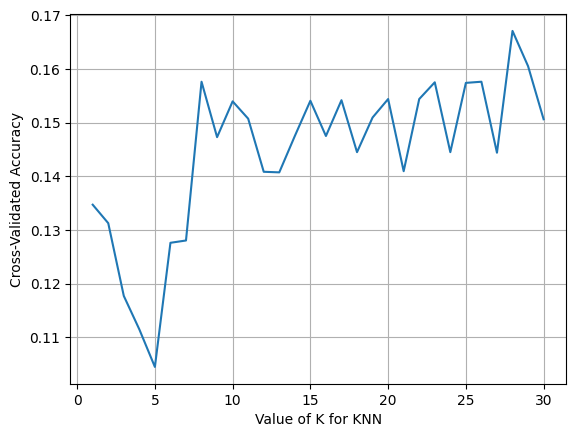

In [374]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

# Из графика видно, что самая оптимальная точность предсказания получается, когда количество классов больше 10. Поэтому имеет смысл придерживаться элемента NEWS

In [375]:
le.fit(data['NEWS-2'])
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12])

In [376]:
# Теперь возьмём в качестве y NEWS
y = pd.Series(data = le.transform(data["NEWS-2"]))
# y = data["NEWS-2"]
# len(y.dropna())
y=data["NEWS-2"]
y

0      2
1      2
2      1
3      4
4      8
      ..
300    3
301    7
302    4
303    3
304    3
Name: NEWS-2, Length: 305, dtype: int64

In [377]:
X

,Возраст,Креат. 1,рСКФ,Пол_1
0,84,80.30,58,0
1,46,92.22,85,1
2,65,67.10,83,0
3,79,126.50,46,1
4,65,109.00,61,1
...,...,...,...,...
300,67,78.50,67,0
301,67,88.94,58,0
302,45,76.10,82,0
303,65,91.08,57,0


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [379]:
from sklearn.model_selection import RandomizedSearchCV

In [380]:
%%time
param_grid = {'n_neighbors':list(range(1,30)),
              'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)

CPU times: user 399 ms, sys: 4.22 ms, total: 403 ms
Wall time: 402 ms


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [381]:
print(grid.best_score_)
print(grid.best_estimator_)

0.15419354838709678
KNeighborsClassifier(n_neighbors=17)


# Лучший результат предсказаний получился 0.15

In [382]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])
for i in scores.keys():
    print(i, ' ',scores[i].round(3),'\n')

fit_time   [0.002 0.002 0.002 0.002 0.001 0.001 0.002 0.001 0.001 0.001] 

score_time   [0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002] 

test_accuracy   [nan nan nan nan nan nan nan nan nan nan] 

test_recall   [nan nan nan nan nan nan nan nan nan nan] 

test_precision   [nan nan nan nan nan nan nan nan nan nan] 

test_f1   [nan nan nan nan nan nan nan nan nan nan] 



# Результатом нескольких экспериментов(а именно 10) стал тот факт, что точность предсказаний класса

In [388]:
clf = KNeighborsClassifier(n_neighbors=9)
model = clf.fit(X_test,y_test)

In [389]:
model.score(X_test,y_test)

0.39344262295081966

In [390]:
svr_model = make_pipeline(StandardScaler(), SVC())

In [386]:
svr_model.fit(X_test,y_test)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [387]:
svr_model.score(X_test,y_test)

0.36065573770491804

In [399]:
from sklearn.preprocessing import Normalizer
# X.describe()
transformer = Normalizer().fit(X)
X2 = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [400]:
%%time
param_grid = {'n_neighbors':list(range(1,30)),
              'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X2,y)

CPU times: user 243 ms, sys: 7.72 ms, total: 251 ms
Wall time: 257 ms


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [401]:
print(grid.best_score_)
print(grid.best_estimator_)

0.18365591397849462
KNeighborsClassifier(n_neighbors=23)


# ну вот, если предсказывать значения по нормализованным данным, то есть по данным, где среднее значение равно ноль и стандартное отклонение равно 1, то лучший резульата получается 0.18